**Code imports necessary libaries:**




In [ ]:
import yfinance as yf # Using yahoo finance api to get historic and on going data

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math

# For machine learning and accuracy testing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import sklearn # for mse and rmse




---





In this project, we're looking at Amazon stock data to see which approach works best for predicting future prices using ARIMA models. We want to figure out if using data from the entire history or just the last year gives us the most accurate predictions. This comparison will help us understand the best timeframe for training ARIMA models and making better forecasts.

In [ ]:
df = yf.download('AMZN')
amazon = yf.Ticker('AMZN')
all_time_test = yf.download('AMZN')
all_time = yf.download('AMZN')
one_year = yf.download('AMZN', start = '2022-11-16', end = '2023-11-16')
one_month = yf.download('AMZN', start = '2023-10-16', end = '2023-11-16')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'Amazon Stock Prices: 1997-2023')

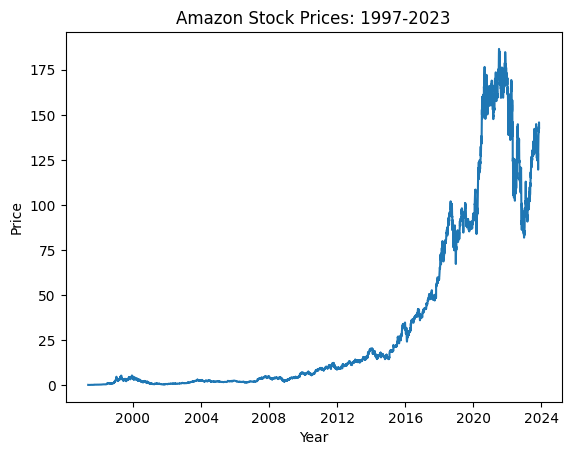

In [ ]:
plt.plot(all_time.index, all_time['Adj Close'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Amazon Stock Prices: 1997-2023')

Text(0.5, 1.0, 'Amazon Stock Prices: 11/2022 - 11/2023')

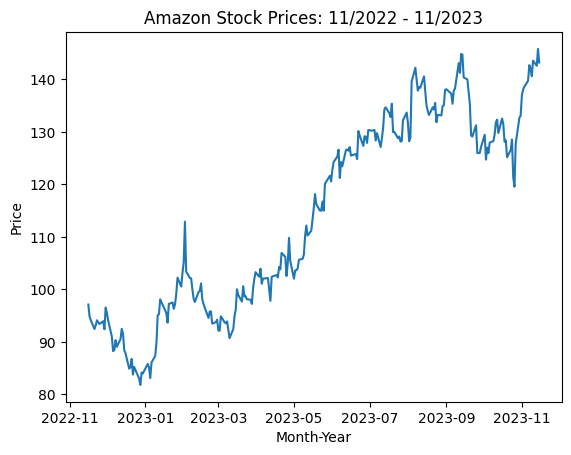

In [ ]:
plt.plot(one_year.index, one_year['Adj Close'])
plt.xlabel('Month-Year')
plt.ylabel('Price')
plt.title('Amazon Stock Prices: 11/2022 - 11/2023')



---



Code breaks down the time series(a series of data points ordered in time.
) of adjusted closing prices into three main components:

*  Trend: The long-term movement or direction in the data.
*  Seasonality: Repeating patterns or cycles that occur at regular intervals (in this case, assumed to be 252 trading days in a year).
*  Residuals: The leftover or irregular component, what remains after removing the trend and seasonality.

The "model = 'additive'" means that we assume the time series is the sum of these three componenets.

In summary, code is an initial step in analyzing and understanding the patterns within historical stock prices. The decomposition allows us to see the underlying trend and seasonal patterns, providing insights that can be useful for forecasting future stock prices.



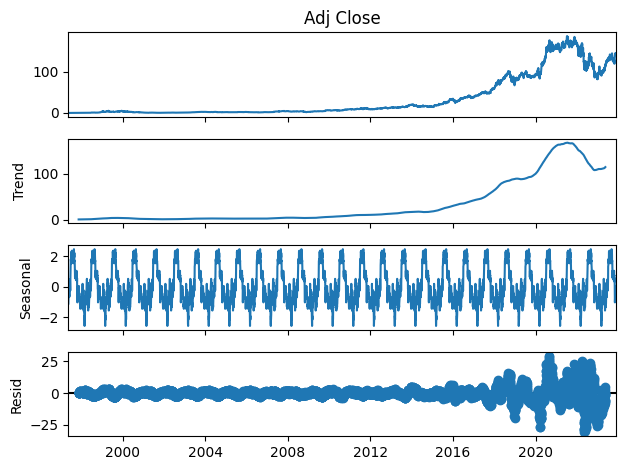

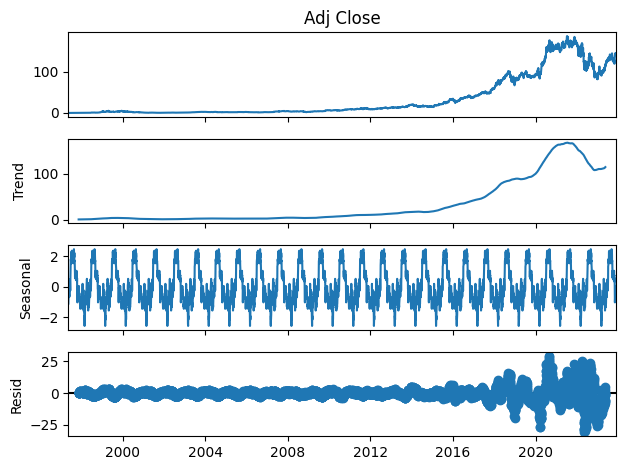

In [ ]:
adj_close_price = all_time['Adj Close']

# Decomposing time series into trend seasonality
result_adj_close = seasonal_decompose(adj_close_price, model = 'additive', period = 252)
result_adj_close.plot()



---



Autocorrelation measures the correlation of a time series with a delayed(lagged) version of itself. In simplier terms, it quantifies how well the past values of a time series predict its future values.


*   If the autocorrelation coefficients are close to 1 or -1, it suggests a strong positive or negative correlation, respectively, at that lag.
*   If the coefficients are close to 0, it indicates a weak or no correlation.

Analyzing a autocorrelation plot can provide insights into the underlying patterns of the time series.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

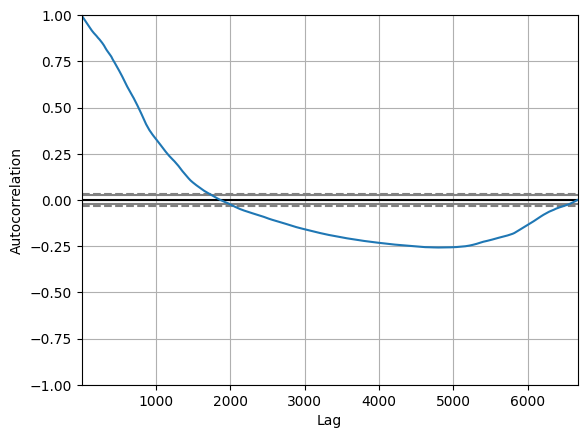

In [ ]:
# autocorrelation plot to determine the order of differencing
autocorrelation_plot(adj_close_price)



---



The code processes the time series data, applies an ARIMA model to historical adjusted close prices, and then uses the trained model to predict future adjusted close prices for a specified number of upcoming business days.

In [ ]:
# Fit ARIMA model for Adj Close

# Sets the frequency of the time series to business days to ensure that time series excludes weekends and holidays
adj_close_price = adj_close_price.asfreq('B') # B means business day

# Create a ARIMA model
ARIMA_adj_close = ARIMA(adj_close_price, order=(2,3,2)) # change to the autocorrelation plot
fit_ARIMA_adj_close = ARIMA_adj_close.fit()


# Forecast future Adj close
forecast_steps = 3 # forecast 3 business days
forecast_adj_close = fit_ARIMA_adj_close.get_forecast(steps = forecast_steps)


Code plots historical and forecasted adjusted prices of Amazon stock for the recent month.

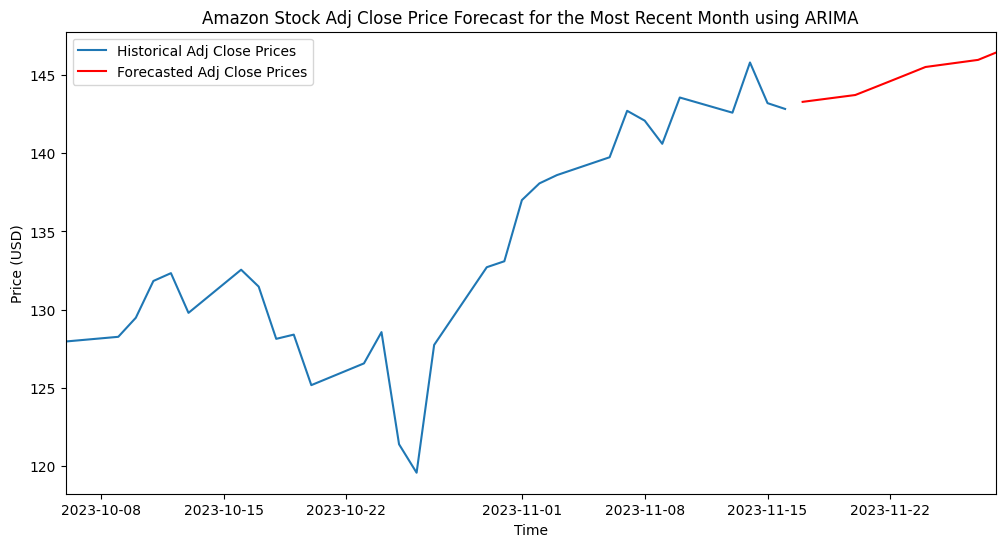

In [ ]:
# Plotting the results for Adj Close
plt.figure(figsize=(12, 6))

# Plot historical Adj Close Prices for the most recent month
recent_month_data = adj_close_price.tail(30)  # Assuming daily data, adjust accordingly
plt.plot(recent_month_data, label='Historical Adj Close Prices')

# Create an index for the forecasted values based on the original time index
forecast_index = pd.date_range(recent_month_data.index[-1], periods=forecast_steps + 1, freq='B')[1:] # line creates an index for the forecasted values. It starts from the last date in the historical data and extends for the specified number of periods

# Plot forecasted Adj Close Prices with the correct time index
plt.plot(forecast_index, forecast_adj_close.predicted_mean, label='Forecasted Adj Close Prices', color='red')

plt.xlim(recent_month_data.index.min(), forecast_index.max())

plt.title('Amazon Stock Adj Close Price Forecast for the Most Recent Month using ARIMA')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



In [ ]:
forecast_last_3_days = forecast_adj_close.predicted_mean.tail(3)

2023-11-17    143.282991
2023-11-20    143.719918
2023-11-21    144.163506
2023-11-22    144.609779
2023-11-23    145.058957
2023-11-24    145.511016
2023-11-27    145.965960
2023-11-28    146.423787
Freq: B, Name: predicted_mean, dtype: float64

Predicted Adjusted Closing Value of Amazon Stocks (model train to all data):

2023-11-17:    143.282991$

2023-11-20:    143.719918$

2023-11-21:    144.163506$

--------------------------------------------------------------------------------
Now we will use the data of the last year to train our model.

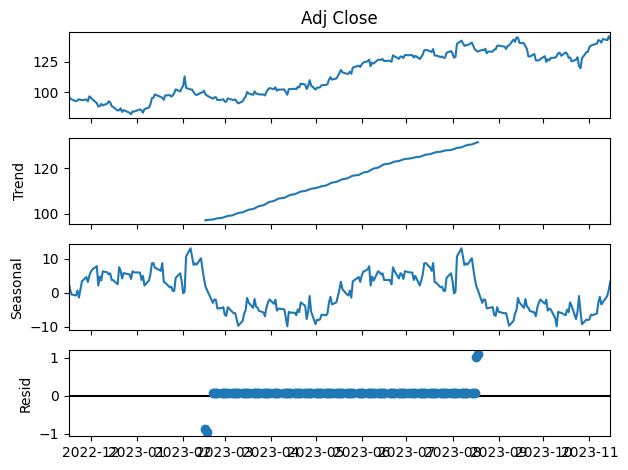

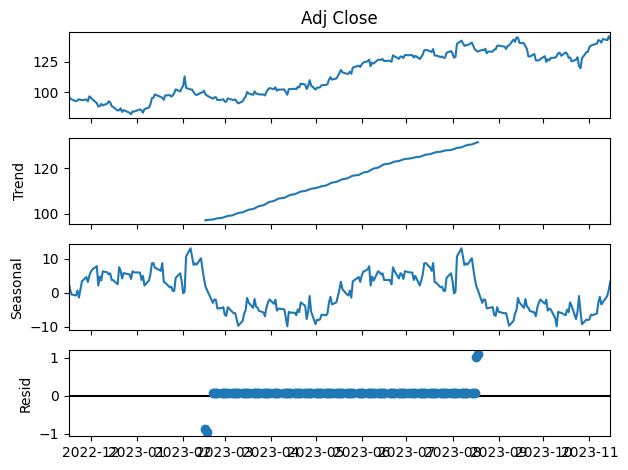

In [ ]:
adj_close_price_1y = one_year['Adj Close']

# Decomposing time series into trend seasonality
result_adj_close_1y = seasonal_decompose(adj_close_price_1y, model = 'additive', period = 125)
result_adj_close_1y.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

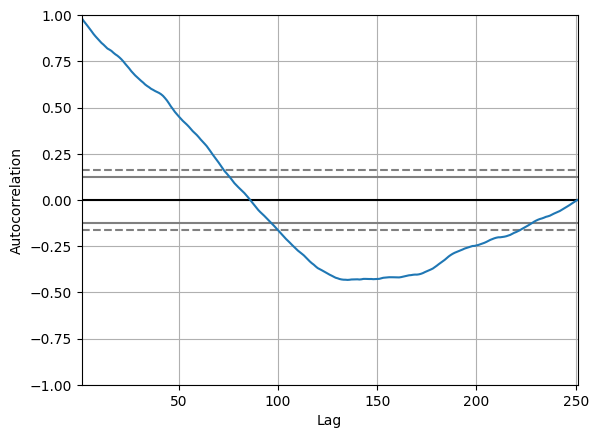

In [ ]:
# autocorrelation plot to determine the order of differencing
autocorrelation_plot(adj_close_price_1y)

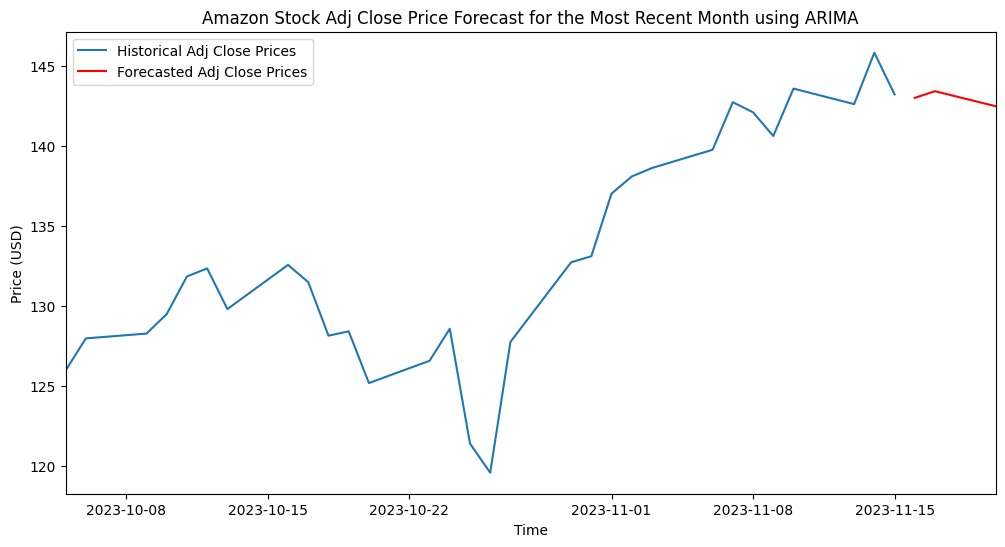

In [ ]:
# Fit ARIMA model for Adj Close

# Sets the frequency of the time series to business days to ensure that time series excludes weekends and holidays
adj_close_price_1y = adj_close_price_1y.asfreq('B') # B means business day

# Create a ARIMA model
ARIMA_adj_close_1y = ARIMA(adj_close_price_1y, order=(2,3,1)) # change to the autocorrelation plot
fit_ARIMA_adj_close_1y = ARIMA_adj_close_1y.fit()


# Forecast future Adj close
forecast_steps = 3 # forecast 3 business days
forecast_adj_close_1y = fit_ARIMA_adj_close_1y.get_forecast(steps = forecast_steps)

# Plotting the results for Adj Close
plt.figure(figsize=(12, 6))

# Plot historical Adj Close Prices for the most recent month
recent_month_data = adj_close_price_1y.tail(30)  # Assuming daily data, adjust accordingly
plt.plot(recent_month_data, label='Historical Adj Close Prices')

# Create an index for the forecasted values based on the original time index
forecast_index = pd.date_range(recent_month_data.index[-1], periods=forecast_steps + 1, freq='B')[1:] # line creates an index for the forecasted values. It starts from the last date in the historical data and extends for the specified number of periods

# Plot forecasted Adj Close Prices with the correct time index
plt.plot(forecast_index, forecast_adj_close_1y.predicted_mean, label='Forecasted Adj Close Prices', color='red')

plt.xlim(recent_month_data.index.min(), forecast_index.max())

plt.title('Amazon Stock Adj Close Price Forecast for the Most Recent Month using ARIMA')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
forecast_last_3_days_1y = forecast_adj_close_1y.predicted_mean.tail(3)
forecast_last_3_days_1y

2023-11-16    142.982063
2023-11-17    143.397408
2023-11-20    142.459245
Freq: B, Name: predicted_mean, dtype: float64

Predicted Adjusted Closing Value of Amazon Stocks (model train to 1 year data):

2023-11-16    142.982063

2023-11-17    143.397408

2023-11-20    142.459245

RMSE of Model


In [ ]:
import numpy as np
# Actual values
actual_values = np.array([142.83, 145.18, 146.13])

# Predicted values
predicted_values = np.array([143.282991,143.719918, 144.163506])

# Calculated RMSE
rmse = np.sqrt(np.mean((actual_values - predicted_values) ** 2))

print("RMSE of all time data on real non-trained or seen data:", rmse)

# Actual values
actual_values = np.array([142.83, 145.18, 146.13])

# Predicted values
predicted_values = np.array([142.982063,143.397408, 142.459245])

# Calculated RMSE
rmse = np.sqrt(np.mean((actual_values - predicted_values) ** 2))


print("RMSE of 1 year data on real non-trained or seen data:", rmse)

RMSE of all time data on real non-trained or seen data: 1.438070344227631
RMSE of 1 year data on real non-trained or seen data: 2.3576259008062803


Now since we found that on non trained or seen data we have found that the all time data was able to give a lower rmse. However it is important to note that there could be more factors to this like how the models had different values and the ones we found may have not been optimal.